**Preprocesamiento de la base de datos de Consumo Electrico**

Este archivo consta de los codigos y conclusiones de:
* 1.Separar en datos de entrenamiento y de prueba.
* 2.Preparar datos para realizar aprendizaje supervizado.


# Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*

In [3]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
#Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from numpy import array

#Modelos de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [4]:
pip install prince --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.7/414.7 kB 12.3 MB/s eta 0:00:00


In [5]:
import prince

In [6]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [7]:
cd /content/gdrive/MyDrive/Tesis/Datos

/content/gdrive/MyDrive/Tesis/Datos


In [8]:
df=pd.read_csv('df.csv')

In [9]:
df.set_index('Date', inplace=True)
features = [feature for feature in df.columns if feature not in ('Day','Month','Year','Week')]
df=df[features]


In [10]:
df.shape

(380380, 15)

In [11]:
df.head(4)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,2,50605.27,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,3,13740.12,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2010-02-05,1,4,39954.04,False,-14.595679,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380380 entries, 2010-02-05 to 2012-10-26
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         380380 non-null  int64  
 1   Dept          380380 non-null  int64  
 2   Weekly_Sales  380380 non-null  float64
 3   IsHoliday     380380 non-null  bool   
 4   Temperature   380380 non-null  float64
 5   Fuel_Price    380380 non-null  float64
 6   MarkDown1     380380 non-null  float64
 7   MarkDown2     380380 non-null  float64
 8   MarkDown3     380380 non-null  float64
 9   MarkDown4     380380 non-null  float64
 10  MarkDown5     380380 non-null  float64
 11  CPI           380380 non-null  float64
 12  Unemployment  380380 non-null  float64
 13  Type          380380 non-null  object 
 14  Size          380380 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(1)
memory usage: 43.9+ MB


#2.Normalizar base de datos

El **método de puntuación z** (a menudo llamado estandarización ) transforma los datos en una distribución con una media de 0 y una desviación estándar de 1 . Cada valor estandarizado se calcula restando la media de la característica correspondiente y luego dividiendo por la desviación estándar.

In [13]:
#Seleccion de caracteristicas
features =df[['Weekly_Sales','IsHoliday','Temperature','Fuel_Price','MarkDown1',	'MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Size']]

#Se define escalado
std_scaler = StandardScaler()
min_scaler= MinMaxScaler()

#Transformacion

for i in features:
  df[i] = std_scaler.fit_transform(df[i].values.reshape(-1,1))

df_pca=df.copy()
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,0.316200,-0.274204,-0.963569,-1.716631,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,1.016794,0.083738,A,0.195601
2010-02-05,1,2,1.418696,-0.274204,-0.963569,-1.716631,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,1.016794,0.083738,A,0.195601
2010-02-05,1,3,-0.163954,-0.274204,-0.963569,-1.716631,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,1.016794,0.083738,A,0.195601
2010-02-05,1,4,0.961430,-0.274204,-0.963569,-1.716631,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,1.016794,0.083738,A,0.195601
2010-02-05,1,5,0.629804,-0.274204,-0.963569,-1.716631,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,1.016794,0.083738,A,0.195601


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00,380380.00
mean,21.92,43.49,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
std,12.74,30.85,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,1.00,1.00,-0.97,-0.27,-3.37,-1.93,-0.43,-0.23,-0.09,-0.28,-0.40,-1.16,-2.19,-1.74
25%,11.00,17.00,-0.62,-0.27,-0.73,-0.93,-0.43,-0.17,-0.08,-0.28,-0.40,-1.00,-0.57,-0.60
50%,22.00,35.00,-0.36,-0.27,0.11,0.20,-0.43,-0.17,-0.08,-0.28,-0.40,0.28,-0.05,0.20
75%,32.00,74.00,0.20,-0.27,0.77,0.82,0.06,-0.17,-0.08,-0.16,0.13,1.05,0.33,1.05
max,45.00,98.00,29.00,3.65,2.18,2.42,14.11,20.22,25.53,16.93,25.04,1.43,3.42,1.33


#Separacion de datos

In [18]:
#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %30 de la data para test
features = [feature for feature in df.columns if feature not in ('Weekly_Sales')]

X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[['Weekly_Sales']], test_size=0.3, shuffle=False)

shape=len(X_train.columns)

print("Separacion de datos terminada!")

Separacion de datos terminada!


#Seleccion de caracteristicas

In [19]:
# Hacer una muestra aleatoria del 20% del dataset
sample = df.sample(frac=0.2, random_state=42)

In [20]:
sample

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2011-02-04,40,85,-0.696531,-0.274204,-2.538806,-0.260080,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,-0.973785,-1.523249,A,0.258163
2012-10-26,31,87,-0.186072,-0.274204,0.566614,0.319923,1.334877,-0.164071,-0.065643,-0.192735,1.158600,1.322919,-0.956077,A,1.066206
2010-07-16,14,25,-0.212471,-0.274204,0.965037,-1.256553,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,0.280072,0.425867,A,1.018853
2010-08-27,34,9,-0.100471,-0.274204,0.695260,-1.609788,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,-1.155032,1.002170,A,0.308489
2012-01-06,40,96,-0.191842,-0.274204,-1.995995,0.173832,0.181145,3.850499,-0.053825,-0.037453,0.661434,-0.883989,-1.981390,A,0.258163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-03-26,11,59,-0.720112,-0.274204,-0.107014,-1.367757,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,1.099259,-0.312638,A,1.128453
2012-06-22,2,38,1.829273,-0.274204,1.138736,-0.028951,1.557560,-0.112675,-0.073512,1.264463,8.143771,1.281091,-0.568832,A,1.042247
2011-04-29,26,5,-0.208780,-0.274204,-0.699763,1.370907,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,-0.941790,-0.070945,A,0.215492


In [21]:
round(sample.describe(),2)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00,76076.00
mean,21.92,43.46,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
std,12.75,30.86,1.02,1.01,1.00,1.00,1.00,1.00,0.98,1.01,1.01,1.00,1.00,1.00
min,1.00,1.00,-0.80,-0.27,-3.37,-1.93,-0.43,-0.23,-0.09,-0.28,-0.40,-1.16,-2.19,-1.74
25%,11.00,17.00,-0.62,-0.27,-0.73,-0.93,-0.43,-0.17,-0.08,-0.28,-0.40,-1.00,-0.57,-0.60
50%,22.00,35.00,-0.36,-0.27,0.11,0.20,-0.43,-0.17,-0.08,-0.28,-0.40,0.28,-0.05,0.20
75%,32.00,74.00,0.20,-0.27,0.77,0.82,0.05,-0.17,-0.08,-0.17,0.13,1.05,0.32,1.05
max,45.00,98.00,27.14,3.65,2.18,2.42,14.11,20.22,25.53,16.93,25.04,1.43,3.42,1.33


##Usando Shap con RandomForestRegressor

In [ ]:
pip install shap --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 27.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer:   2%|▏         | 2231/114114 [43:07<34:03:25,  1.10s/it]

In [ ]:
shap.plots.bar(shap_values)

##Ramdom forest regresor, para RFECV

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
estimator = RandomForestRegressor(n_estimators=150)

In [ ]:
# Crear una instancia de RFECV con validación cruzada
rfecv = RFECV(estimator=estimator,step=3, cv=TimeSeriesSplit(n_splits=50))

# Aplicar la eliminación recursiva de características con validación cruzada
X_selected = rfecv.fit(X_train, Y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[rfecv.support_]
print(selected_features)

In [ ]:
# Obtener las puntuaciones de importancia de características
feature_importances = rfecv.estimator_.feature_importances_

# Crear un gráfico de barras para visualizar las puntuaciones de importancia de características
plt.figure(figsize=(6, 5))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Puntuación de importancia')
plt.title('Importancia de características seleccionadas')
plt.show()

##Analisis de correlacion

In [38]:
!pip install phik --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.0 MB/s eta 0:00:00


In [39]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']


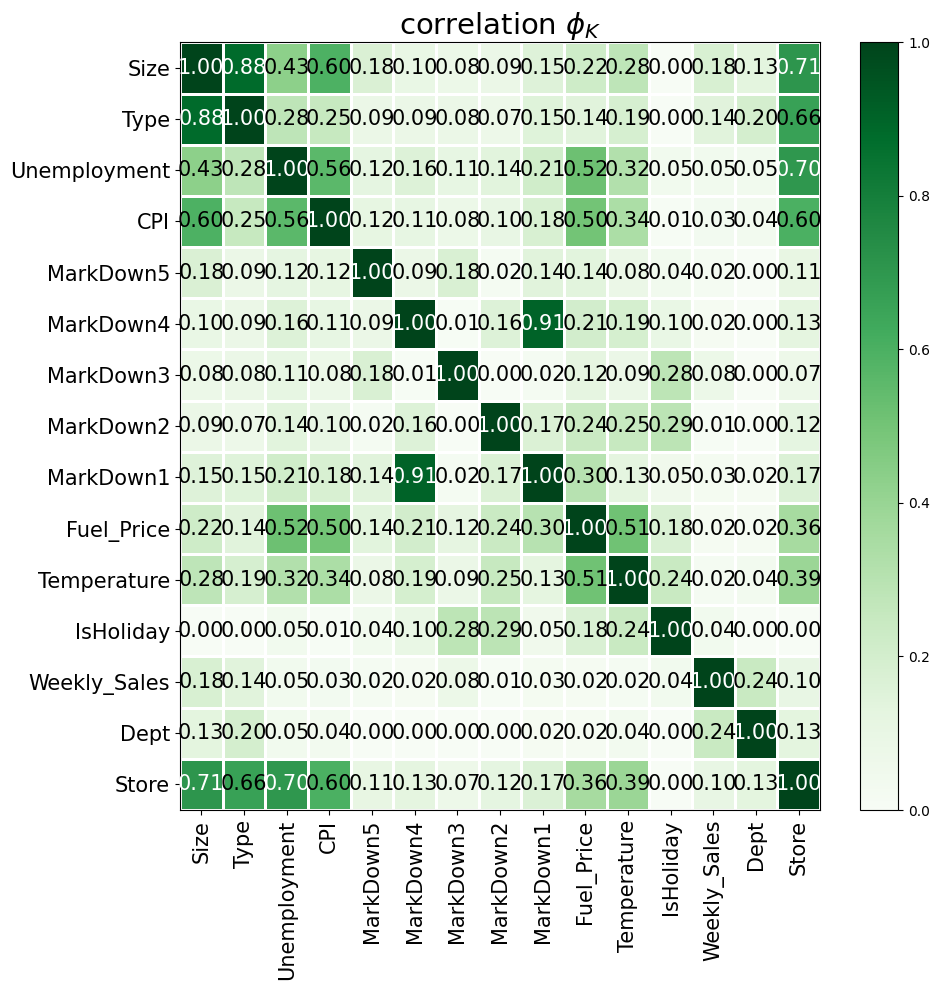

In [42]:
phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(10, 10))
plt.tight_layout()

<Axes: >

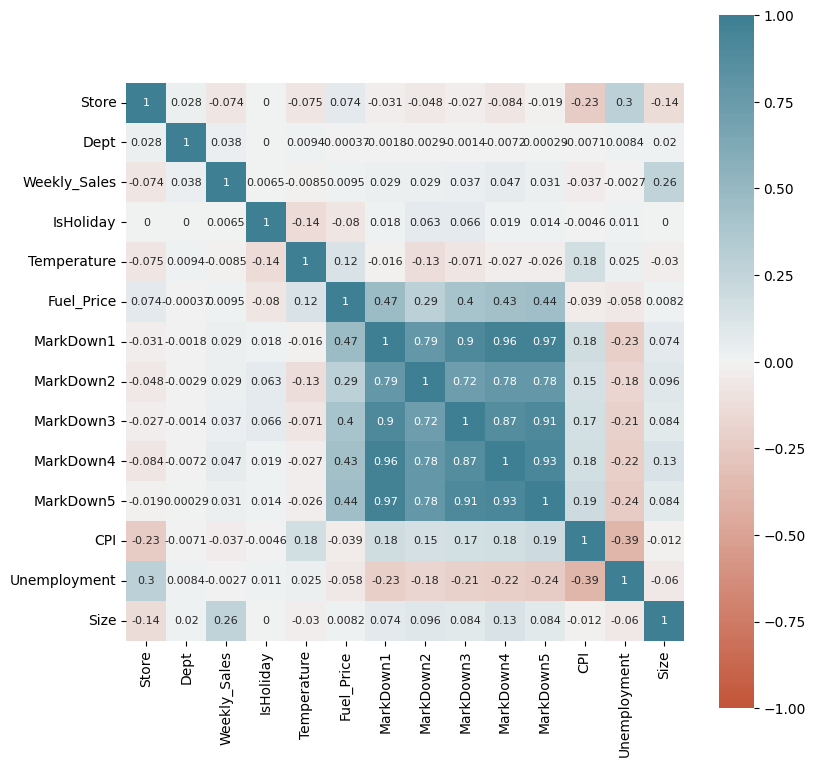

In [41]:
plt.figure(figsize=(9,9))
sns.heatmap(
    df.corr("spearman"),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)

#FAMD

In [23]:
sample.head(5)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,
2011-02-04,1.418428,1.345342,-0.696531,-0.274204,-2.538806,-0.260080,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,-0.973785,-1.523249,0.258163,0.949399,-0.789266,-0.314918
2012-10-26,0.712267,1.410169,-0.186072,-0.274204,0.566614,0.319923,1.334877,-0.164071,-0.065643,-0.192735,1.158600,1.322919,-0.956077,1.066206,0.949399,-0.789266,-0.314918
2010-07-16,-0.621593,-0.599467,-0.212471,-0.274204,0.965037,-1.256553,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,0.280072,0.425867,1.018853,0.949399,-0.789266,-0.314918
2010-08-27,0.947654,-1.118082,-0.100471,-0.274204,0.695260,-1.609788,-0.432054,-0.173931,-0.084542,-0.280823,-0.395325,-1.155032,1.002170,0.308489,0.949399,-0.789266,-0.314918
2012-01-06,1.418428,1.701891,-0.191842,-0.274204,-1.995995,0.173832,0.181145,3.850499,-0.053825,-0.037453,0.661434,-0.883989,-1.981390,0.258163,0.949399,-0.789266,-0.314918


In [31]:
famd = prince.FAMD(
    n_components=5,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(sample)

In [32]:
famd.column_coordinates_

component,0,1,2,3,4
variable,,,,,
Weekly_Sales,0.059465,0.030224,0.008018,0.095902,0.192530
IsHoliday,0.000060,0.000379,0.000967,0.006189,0.000348
Temperature,0.008317,0.056605,0.024396,0.116830,0.013786
Fuel_Price,0.000766,0.017872,0.042584,0.014586,0.068011
MarkDown1,0.090144,0.044771,0.000128,0.052337,0.232981
MarkDown2,0.016743,0.005685,0.001715,0.027168,0.016797
MarkDown3,0.001216,0.000533,0.000391,0.002298,0.000046
MarkDown4,0.063617,0.032406,0.000033,0.052792,0.197137
MarkDown5,0.068962,0.005705,0.002397,0.023847,0.131225


In [33]:
famd.column_contributions_.style.format('{:.0%}')

component,0,1,2,3,4
variable,,,,,
Weekly_Sales,1%,1%,0%,4%,10%
IsHoliday,0%,0%,0%,0%,0%
Temperature,0%,2%,1%,5%,1%
Fuel_Price,0%,1%,2%,1%,3%
MarkDown1,2%,1%,0%,2%,12%
MarkDown2,0%,0%,0%,1%,1%
MarkDown3,0%,0%,0%,0%,0%
MarkDown4,2%,1%,0%,2%,10%
MarkDown5,2%,0%,0%,1%,7%


In [34]:
summary_famd = famd.eigenvalues_summary
# Quita el signo de porcentaje y convierte a flotante
summary_famd['% of variance'] = summary_famd['% of variance'].str.rstrip('%').astype('float') / 100.0
summary_famd['% of variance (cumulative)'] = summary_famd['% of variance (cumulative)'].str.rstrip('%').astype('float') / 100.0
summary_famd

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,4.054,0.0216,0.0216
1,3.174,0.0169,0.0386
2,2.685,0.0143,0.0529
3,2.165,0.0115,0.0644
4,1.964,0.0105,0.0749


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
component
0    0.0216
1    0.0169
2    0.0143
3    0.0115
4    0.0105
Name: % of variance, dtype: float64


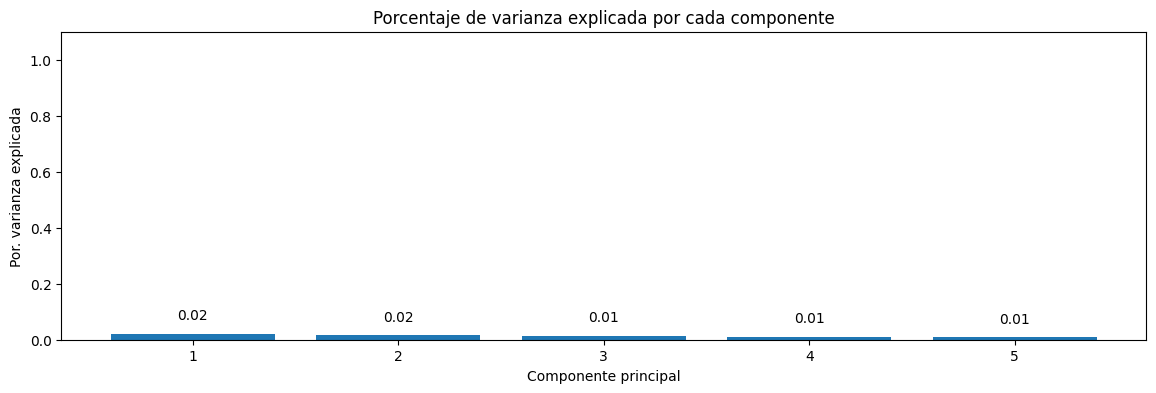

In [35]:
import numpy as np
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(summary_famd['% of variance'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))
ax.bar(
    x      = np.arange(len(summary_famd)) + 1,
    height = summary_famd['% of variance']
)

for x, y in zip(np.arange(len(summary_famd)) + 1, summary_famd['% of variance']):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(len(summary_famd)) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()


In [36]:
coordenadas_componentes = famd.column_coordinates_
coordenadas_componentes

component,0,1,2,3,4
variable,,,,,
Weekly_Sales,0.059465,0.030224,0.008018,0.095902,0.192530
IsHoliday,0.000060,0.000379,0.000967,0.006189,0.000348
Temperature,0.008317,0.056605,0.024396,0.116830,0.013786
Fuel_Price,0.000766,0.017872,0.042584,0.014586,0.068011
MarkDown1,0.090144,0.044771,0.000128,0.052337,0.232981
MarkDown2,0.016743,0.005685,0.001715,0.027168,0.016797
MarkDown3,0.001216,0.000533,0.000391,0.002298,0.000046
MarkDown4,0.063617,0.032406,0.000033,0.052792,0.197137
MarkDown5,0.068962,0.005705,0.002397,0.023847,0.131225


In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import prince
import numpy as np
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
import plotly.graph_objects as go

# Transpone el DataFrame para que los nombres de las variables sean las columnas
coordenadas_componentes_transposed = coordenadas_componentes.T

# Gráfico 2D con Plotly
trace = go.Scatter(x=coordenadas_componentes_transposed.loc[0],
                   y=coordenadas_componentes_transposed.loc[1],
                   mode='markers+text',
                   text=coordenadas_componentes_transposed.columns,
                   textposition='top center')
layout = go.Layout(title='Gráfico 2D',
                   xaxis=dict(title='Component 1'),
                   yaxis=dict(title='Component 2'))
fig2d = go.Figure(data=[trace], layout=layout)
fig2d.show()

# Gráfico 3D con Plotly
trace = go.Scatter3d(x=coordenadas_componentes_transposed.loc[0],
                     y=coordenadas_componentes_transposed.loc[1],
                     z=coordenadas_componentes_transposed.loc[2],
                     mode='markers+text',
                     text=coordenadas_componentes_transposed.columns,
                     textposition='top center')
layout = go.Layout(title='Gráfico 3D',
                   scene=dict(xaxis=dict(title='Component 1'),
                              yaxis=dict(title='Component 2'),
                              zaxis=dict(title='Component 3')))
fig3d = go.Figure(data=[trace], layout=layout)
fig3d.show()
